Our blobs are using a game to calculate pi. They stand with uniform randomness on the square ((0, 1), (0, 1)). Each blob calculates the distance from their position to the origin using Pythagoras. If it is less than 1, they turn red. If it is more than 1, they turn blue. We can count the number of blobs of each color, and use the result to calculate pi.

pi = 4 * red blobs / all blobs, because the red area is pi r^2 / 4 for r = 1 and the square is 1 x 1.

In [1]:
import random as r
import matplotlib.pyplot as plt
from tqdm import tqdm
r.seed(1)

Main logic

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 244.93it/s]


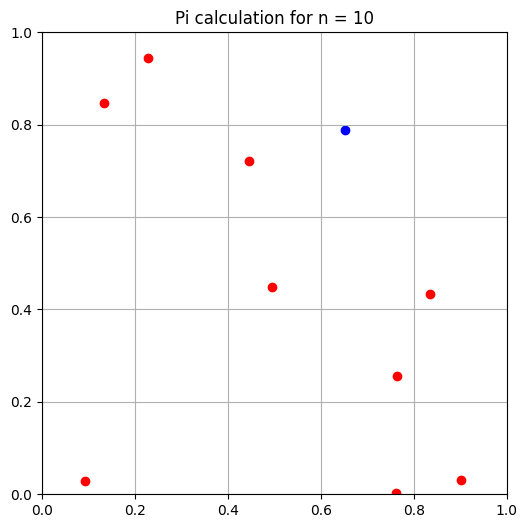

Result = 3.6


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 230.95it/s]


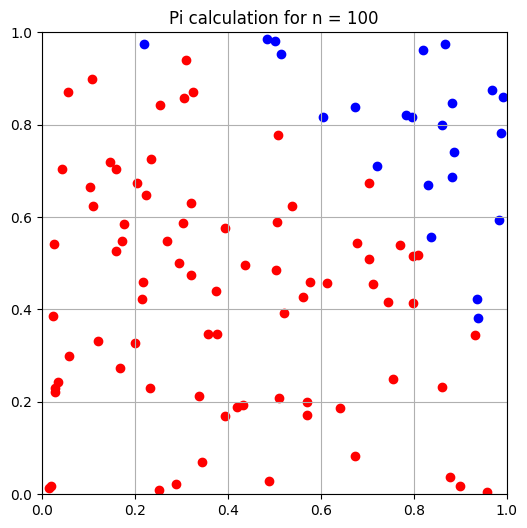

Result = 3.08


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 150.91it/s]


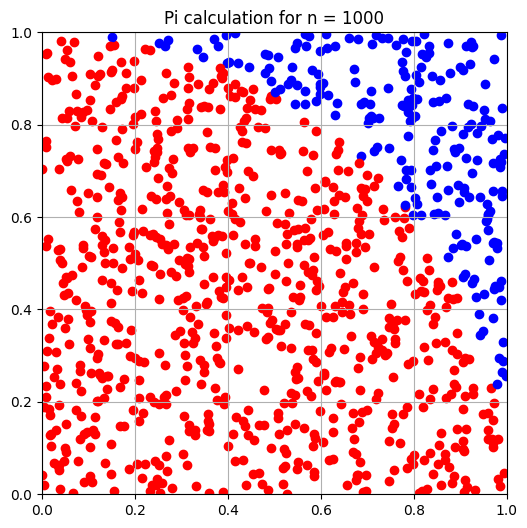

Result = 3.14


Pi calculation for n = 10000.0
Result = 3.1456


Pi calculation for n = 100000.0
Result = 3.13844


Pi calculation for n = 1000000.0
Result = 3.14114


In [2]:
def generateBlob():
    position = [r.uniform(0, 1), r.uniform(0, 1)]
    color = "Red" if sum(x ** 2 for x in position) < 1 else "Blue"
    return(position, color)

def calculatePi(numBlobs, plot = True):
    population = [generateBlob() for n in range(int(numBlobs))]
    numReds = sum(1 for blob in population if blob[1] == "Red")
    if plot:
        plt.figure(figsize = (6, 6))
        plt.title(f"Pi calculation for n = {numBlobs}") 
        for blob in tqdm(population):
            plt.scatter(blob[0][0], blob[0][1], color = blob[1])
        plt.xlim(0, 1)
        plt.ylim(0, 1)
        plt.grid(True)
        plt.show()
    else:
        print("")
        print("")
        print(f"Pi calculation for n = {numBlobs}") 
    print(f"Result = {4 * numReds / numBlobs}") 
    return(4 * numReds / numBlobs)

for n in [10, 100, 1000, 1e4, 1e5, 1e6]:
    plot = True if n < 1001 else False
    calculatePi(n, plot)

In principle we can throw more and more blobs at this and get better and better predictions for pi, but in practice it starts to get computationally expensive. The inherent randomness in this process never quite vanishes, and though the law of large numbers is a thing, in practice this caculation isn't going to get us more than 3.d.p of precision in an amount of time that's worth waiting.